# Biological Controls

Gene trajectories reflect expected biology for each disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
normalized_length = 101

In [3]:
cd_dfs = [pd.read_csv(f'colon/colon_CD_{section}_counts.csv') for section in 'ABCD']
uc_dfs = [pd.read_csv(f'colon/colon_UC_{section}_counts.csv') for section in 'ABCD']

In [4]:
# average using dtw
def _stack_dtw():
    from dtw import dtw, warp
    alignment_genes = ['EPCAM', 'ACTA2']

    cd_ref_idx = 1
    uc_ref_idx = 1

    cd_aligned = np.empty((len(cd_dfs), cd_dfs[cd_ref_idx].shape[0] - 1, cd_dfs[cd_ref_idx].shape[1]))
    uc_aligned = np.empty((len(uc_dfs), uc_dfs[uc_ref_idx].shape[0] - 1, uc_dfs[uc_ref_idx].shape[1]))

    def z_norm(x):
        # z norm each column
        return (x - x.mean(axis=0)) / x.std(axis=0)

    for dfs, ref_idx, aligned_mat in [
        (cd_dfs, cd_ref_idx, cd_aligned),
        (uc_dfs, uc_ref_idx, uc_aligned),
    ]:
        plt.close()
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
        ax1.set_title('EPCAM')
        ax2.set_title('ACTA2')
        ref = dfs[ref_idx][alignment_genes].to_numpy()
        ref = z_norm(ref)
        for i, df in enumerate(dfs):
            qry = df[alignment_genes].to_numpy()
            qry = z_norm(qry)
            alignment = dtw(qry, ref)
            idxs = warp(alignment)
            print(len(df), min(idxs), max(idxs))
            aligned = df.iloc[idxs]
            aligned_mat[i] = aligned
            ax1.scatter(np.arange(len(aligned)), aligned['EPCAM'])
            ax2.scatter(np.arange(len(aligned)), aligned['ACTA2'])
        plt.show()

    return cd_aligned, uc_aligned


def _stack_relative():
    # average using relative path length
    cd_aligned = np.empty((len(cd_dfs), normalized_length, cd_dfs[0].shape[1]))
    uc_aligned = np.empty((len(uc_dfs), normalized_length, uc_dfs[0].shape[1]))

    for dfs, aligned_mat in [
        (cd_dfs, cd_aligned),
        (uc_dfs, uc_aligned),
    ]:
        for i, df in enumerate(dfs):
            e_idx = df.columns.to_list().index('EPCAM')
            a_idx = df.columns.to_list().index('ACTA2')
            xp = np.linspace(0, 1, len(df))
            x = np.linspace(0, 1, normalized_length)
            out = []
            for j in range(df.shape[1]):
                interp = np.interp(x, xp, df.iloc[:, j].to_numpy())
                out.append(interp)
            aligned_mat[i] = np.asarray(out).T
    return cd_aligned, uc_aligned


def stack_trajectories(method):
    if method == "dtw":
        return _stack_dtw()
    elif method == "relative":
        return _stack_relative()

42 0 40
41 0 39
34 0 27
56 5 51


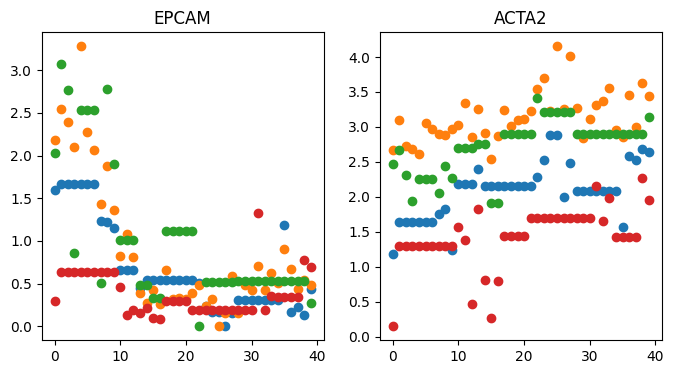

64 0 54
59 0 57
78 0 68
54 0 53


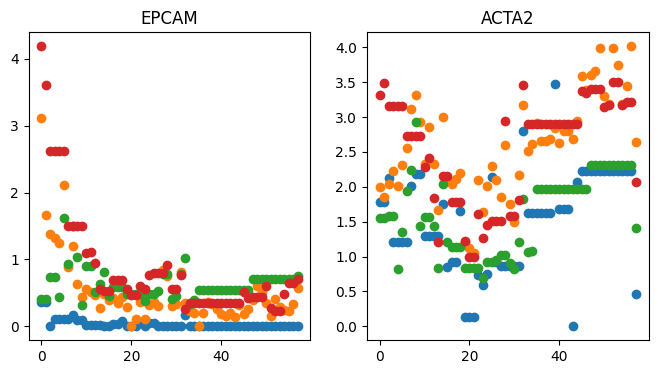

In [76]:
# cd_aligned, uc_aligned = stack_trajectories("dtw")

In [5]:
cd_aligned, uc_aligned = stack_trajectories("relative")

In [6]:
cd_counts = pd.DataFrame(cd_aligned[[0,1,2,3]].mean(axis=0), columns=cd_dfs[0].columns)
uc_counts = pd.DataFrame(uc_aligned[[0,1,2,3]].mean(axis=0), columns=uc_dfs[0].columns)

cd_stds = pd.DataFrame(cd_aligned[[0,1,2,3]].std(axis=0), columns=cd_dfs[0].columns)
uc_stds = pd.DataFrame(uc_aligned[[0,1,2,3]].std(axis=0), columns=uc_dfs[0].columns)

[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]
[Text(0.0, 0, '0.0'), Text(0.2, 0, '0.2'), Text(0.4, 0, '0.4'), Text(0.6000000000000001, 0, '0.6'), Text(0.8, 0, '0.8'), Text(1.0, 0, '1.0')]


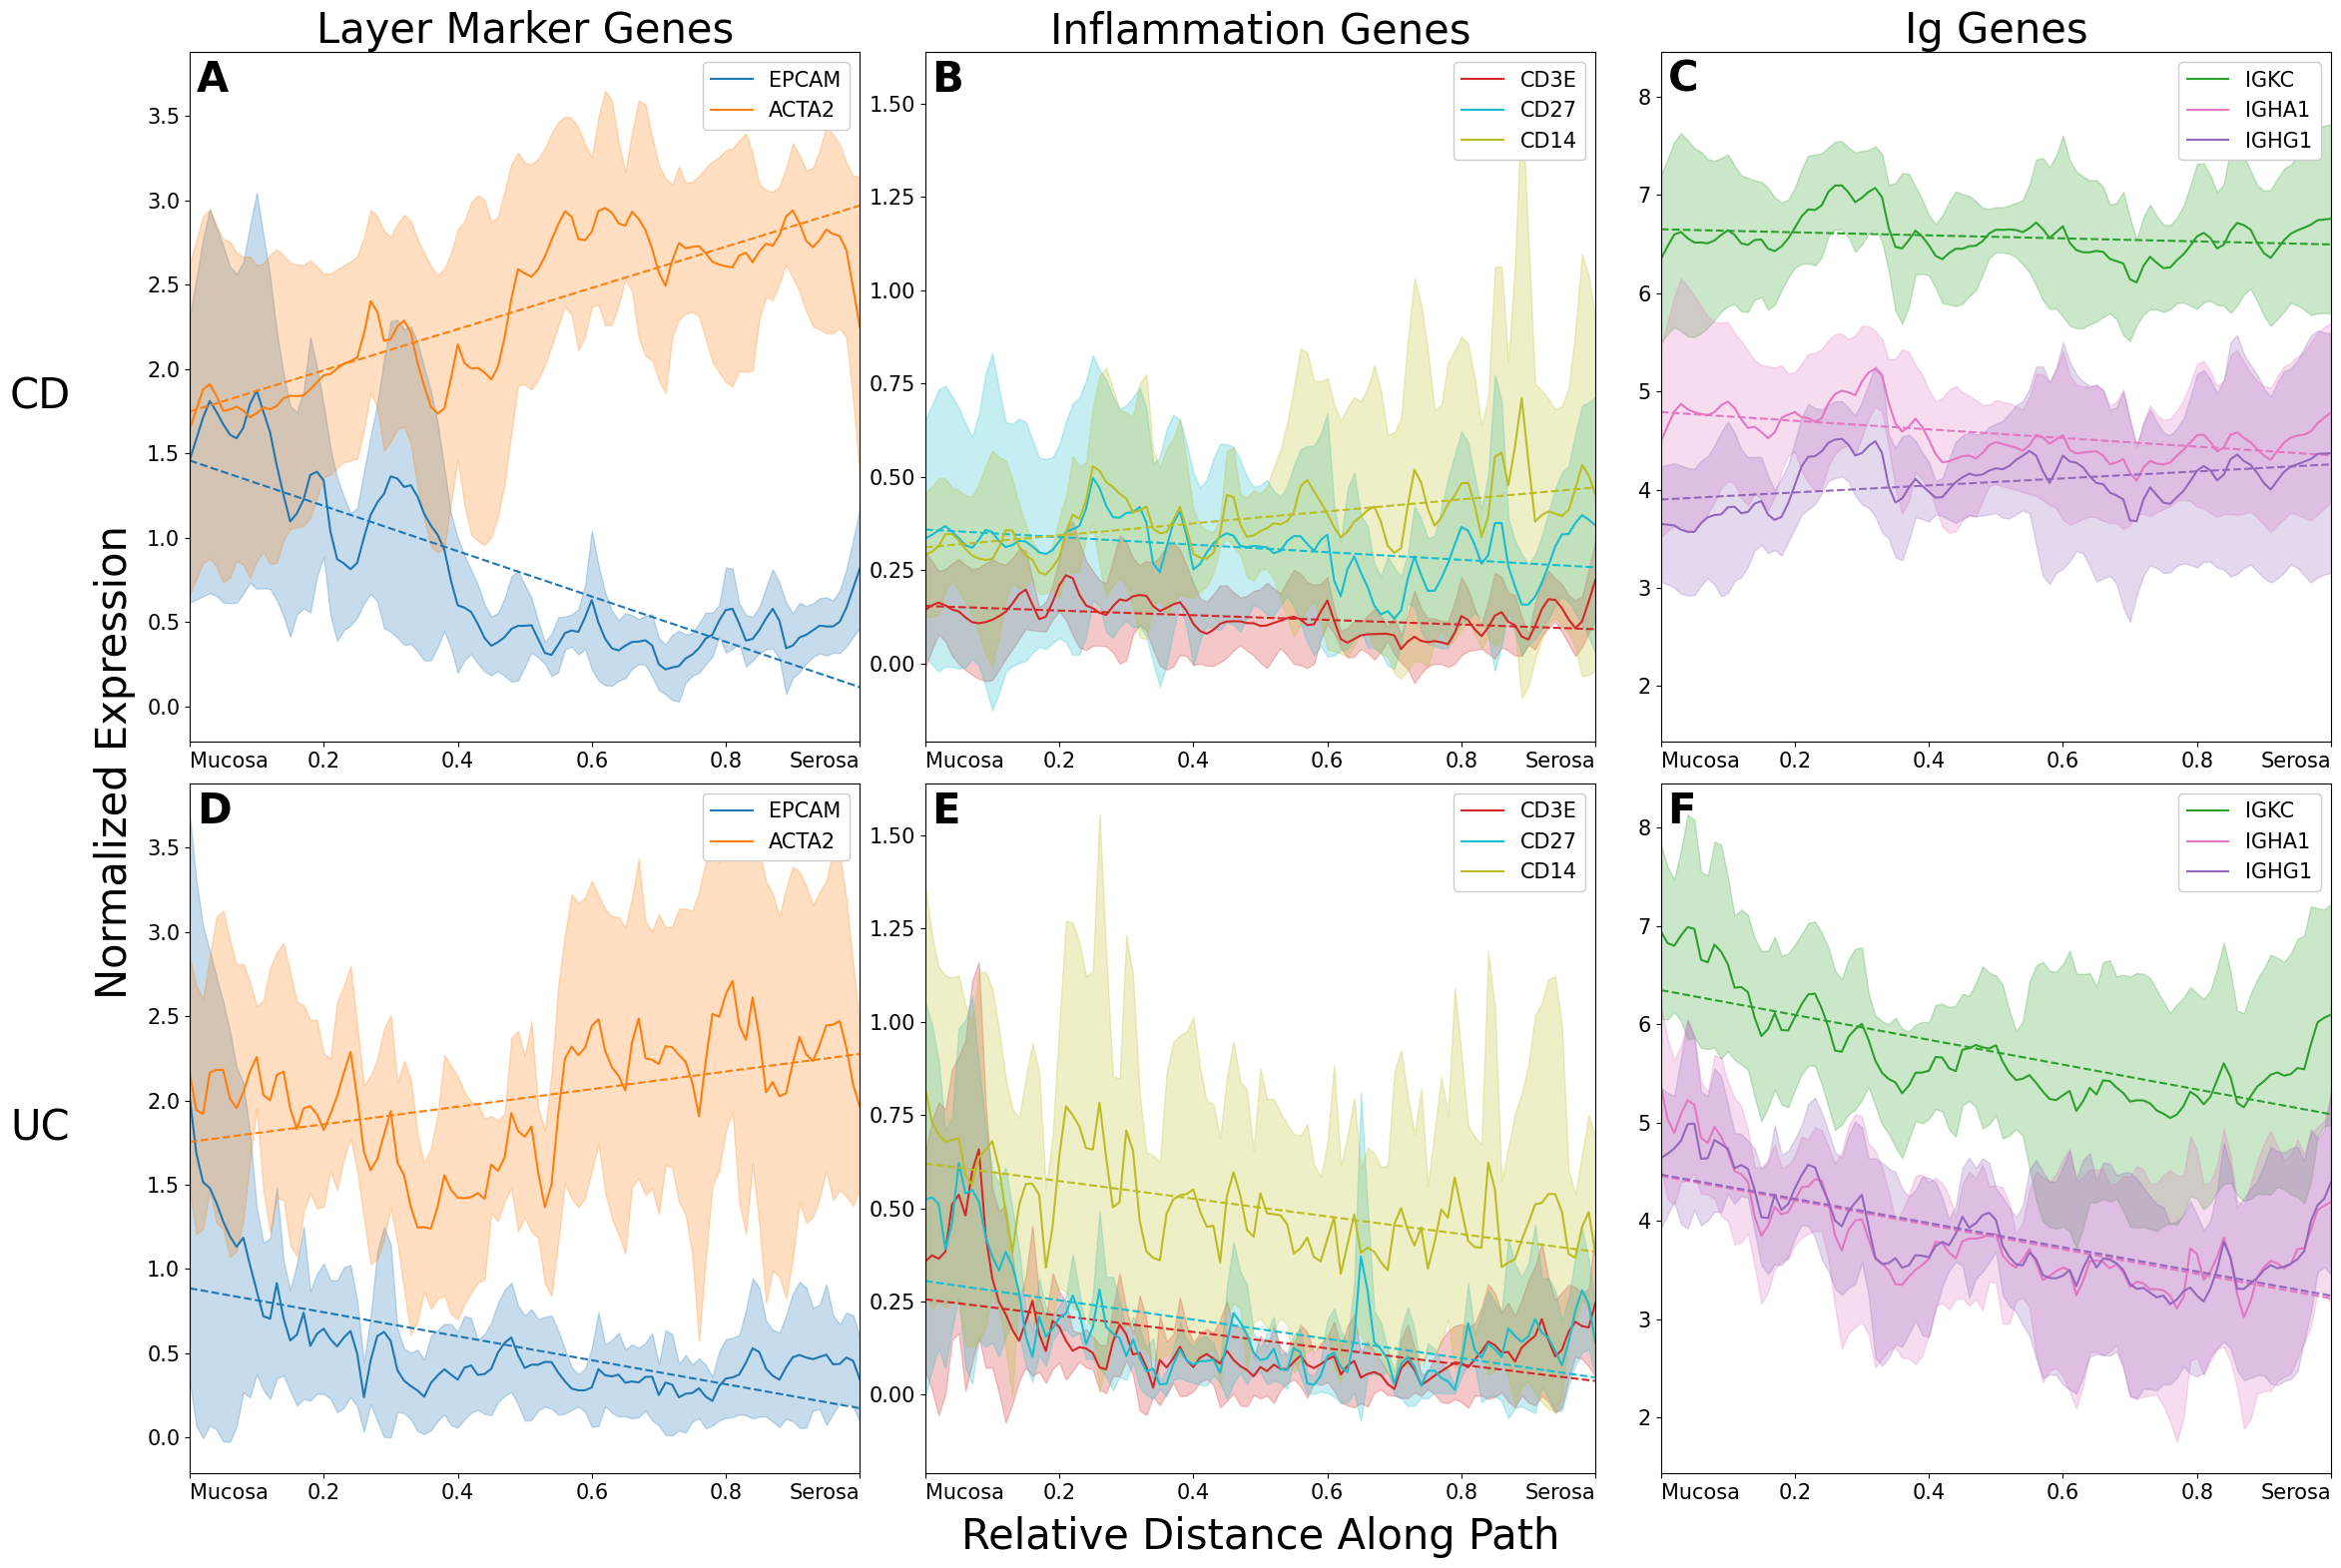

In [7]:
figsize = 8
fontsize = 15

plt.close()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(figsize*3, figsize*2))
ax1.sharey(ax4)
ax2.sharey(ax5)
ax3.sharey(ax6)
path = np.linspace(0, 1, normalized_length)

for ax, (df, stds) in zip([ax1, ax4], [(cd_counts, cd_stds), (uc_counts, uc_stds)]):
    # path = np.arange(len(df))
    for gene, color in zip(['EPCAM', 'ACTA2'], ['tab:blue', 'tab:orange']):
        ax.plot(path, df[gene], color=color, label=gene)
        ax.fill_between(path, df[gene]-stds[gene], df[gene]+stds[gene], color=color, alpha=0.25)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color, linestyle='--')
    ax.legend(loc='upper right', framealpha=1, fontsize=fontsize)

for ax, (df, stds) in zip([ax2, ax5], [(cd_counts, cd_stds), (uc_counts, uc_stds)]):
    # path = np.arange(len(df))
    for gene, color in zip(['CD3E', 'CD27', 'CD14'], ['tab:red', 'tab:cyan', 'tab:olive']):
        ax.plot(path, df[gene], color=color, label=gene)
        ax.fill_between(path, df[gene]-stds[gene], df[gene]+stds[gene], color=color, alpha=0.25)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color, linestyle='--')
    ax.legend(loc='upper right', framealpha=1, fontsize=fontsize)

for ax, (df, stds) in zip([ax3, ax6], [(cd_counts, cd_stds), (uc_counts, uc_stds)]):
    # path = np.arange(len(df))
    for gene, color in zip(['IGKC', 'IGHA1', 'IGHG1'], ['tab:green', 'tab:pink', 'tab:purple']):
        ax.plot(path, df[gene], color=color, label=gene)
        ax.fill_between(path, df[gene]-stds[gene], df[gene]+stds[gene], color=color, alpha=0.25)
        ax.plot(path, np.poly1d(np.polyfit(path, df[gene], 1))(path), color=color, linestyle='--')
    ax.legend(loc='upper right', framealpha=1, fontsize=fontsize)

def fix_labels(ax):
    ax.set_xlim([0, 1])
    ax.tick_params(axis='both', labelsize=fontsize)
    ax_labels = ax.get_xticklabels()
    print(ax_labels)
    ax_labels[0] = 'Mucosa'
    ax_labels[-1] = 'Serosa'
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax_labels)
    ax_ticks = ax.get_xmajorticklabels()
    ax_ticks[0].set_horizontalalignment("left")
    ax_ticks[-1].set_horizontalalignment("right")

fix_labels(ax1)
fix_labels(ax2)
fix_labels(ax3)
fix_labels(ax4)
fix_labels(ax5)
fix_labels(ax6)

fig.tight_layout()
fig.subplots_adjust(left=0.1, top=0.95, bottom=0.06)
ax1_bbox = ax1.get_position()
ax2_bbox = ax2.get_position()
ax3_bbox = ax3.get_position()
ax4_bbox = ax4.get_position()
ax5_bbox = ax5.get_position()
ax6_bbox = ax6.get_position()

ax1.set_title('Layer Marker Genes', fontsize=fontsize*2)
ax2.set_title('Inflammation Genes', fontsize=fontsize*2)
ax3.set_title('Ig Genes', fontsize=fontsize*2)

dz1_y = ax1_bbox.height / 2 + ax1_bbox.ymin
fig.text(0.025, dz1_y, 'CD', fontsize=fontsize*2, va='center')

dz2_y = ax4_bbox.height / 2 + ax4_bbox.ymin
fig.text(0.025, dz2_y, 'UC', fontsize=fontsize*2, va='center')

ylabel_y = (ax1_bbox.ymin - ax4_bbox.ymax) / 2 + ax4_bbox.ymax
fig.text(0.06, ylabel_y, 'Normalized Expression', fontsize=fontsize*2, rotation=90, va='center')

xlabel_x = (ax5_bbox.xmax - ax5_bbox.xmin) / 2 + ax5_bbox.xmin
fig.text(xlabel_x, 0.02, 'Relative Distance Along Path', fontsize=fontsize*2, ha='center', va='center')

def _panel_label_coords(bbox, xoffset=0.01, yoffset=0.01):
    x = bbox.width * xoffset + bbox.xmin
    y = bbox.ymax - bbox.height * yoffset
    return x, y

fig.text(*_panel_label_coords(ax1_bbox), 'A', ha='left', va='top', fontsize=fontsize*2, weight='bold')
fig.text(*_panel_label_coords(ax2_bbox), 'B', ha='left', va='top', fontsize=fontsize*2, weight='bold')
fig.text(*_panel_label_coords(ax3_bbox), 'C', ha='left', va='top', fontsize=fontsize*2, weight='bold')
fig.text(*_panel_label_coords(ax4_bbox), 'D', ha='left', va='top', fontsize=fontsize*2, weight='bold')
fig.text(*_panel_label_coords(ax5_bbox), 'E', ha='left', va='top', fontsize=fontsize*2, weight='bold')
fig.text(*_panel_label_coords(ax6_bbox), 'F', ha='left', va='top', fontsize=fontsize*2, weight='bold')

fig.savefig('figs/fig3.png')
fig.savefig('figs/fig3.pdf')

In [19]:
n = 5000
cands = sorted(list(set(cd_counts.std().sort_values().tail(n).index) & set(uc_counts.std().sort_values().head(n).index)))
cands

['ANXA10',
 'B4GALNT2',
 'CRLF2',
 'FOXD3',
 'JHY',
 'OPN1SW',
 'OR2K2',
 'RGS6',
 'SLC26A7',
 'TNNI3K',
 'ZNF334']

In [23]:
len(cands)

11

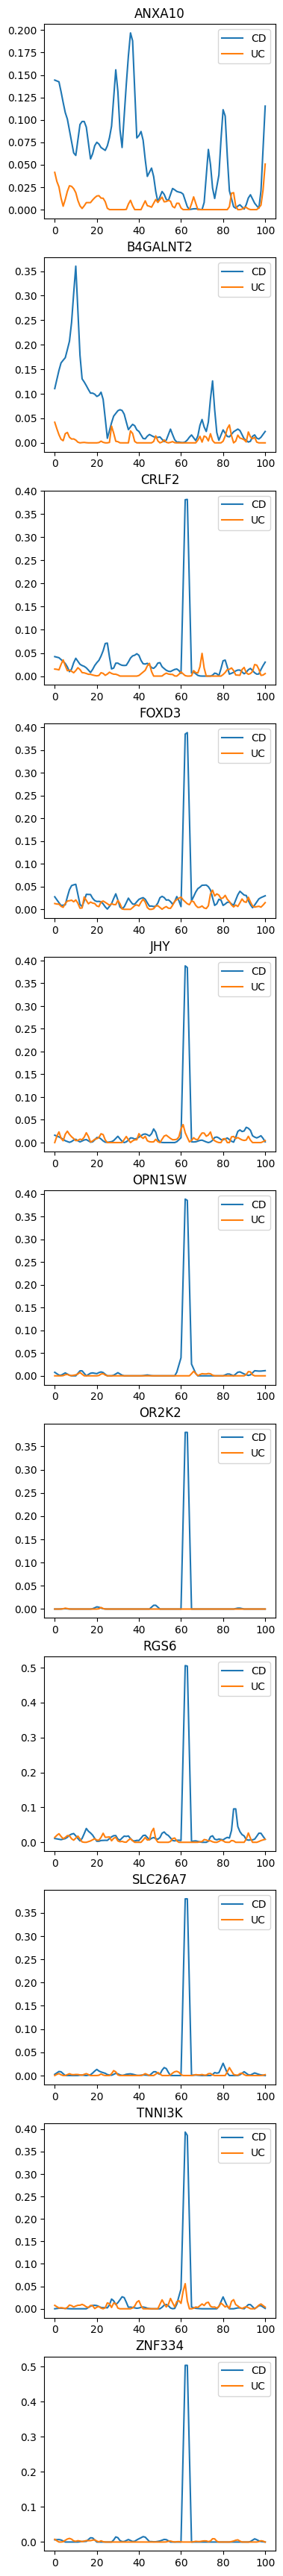

In [22]:
plt.close()
fig, axs = plt.subplots(len(cands), 1, figsize=(4, 4*len(cands)))
for ax, cand in zip(axs, cands):
    ax.plot(cd_counts[cand], label='CD')
    ax.plot(uc_counts[cand], label='UC')
    ax.set_title(cand)
    ax.legend()